In [1]:
import matplotlib.pyplot as plt
import cv2
from keras import models
import numpy as np
import pdb

2022-12-13 09:15:53.424478: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#img = cv2.imread('./PKLot/PKLot/PUCPR/Cloudy/2012-09-12/2012-09-12_06_05_16.jpg')
img = cv2.imread('./PKLot/PKLot/PUCPR/Cloudy/2012-09-28/2012-09-28_07_26_01.jpg')
img = cv2.resize(img, (1350, 720), interpolation = cv2.INTER_AREA)
#img = mpimg.imread('./PKLot/PKLotSegmented_resized/PUC/Rainy/2012-10-23/Occupied/2012-10-23_08_15_50#006.jpg')

model = models.load_model('./simple_nn/simple_nn_linear')
# model = models.load_model('./simple_conv/simple_conv_weights_dense_leaky_relu')

2022-12-13 09:16:20.415859: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
step = 30
w_size = 45
heatmap_empty = np.zeros((img.shape[0] // step, img.shape[1] // step))
heatmap_occupied = np.zeros(heatmap_empty.shape)

print(img.shape)
print(heatmap_empty.shape)
for column in range(heatmap_empty.shape[1]):
    for row in range(heatmap_empty.shape[0]):
        segment = img[row*step:row*step+w_size, column*step:column*step+w_size, :]
        print(row*step+step, column*step+step)
        # if column*step+90 == 810:
        #     pdb.set_trace()
        prediction = model.predict(cv2.resize(segment, (90, 90)).reshape((1, 90, 90, 3)))
        heatmap_empty[row, column] = prediction[0][0]
        heatmap_occupied[row, column] = prediction[0][1]

(720, 1350, 3)
(24, 45)
30 30
1/1 [==============================] - 0s 481ms/step
60 30
1/1 [==============================] - 0s 126ms/step
90 30
1/1 [==============================] - 0s 86ms/step
120 30
1/1 [==============================] - 0s 78ms/step
150 30
1/1 [==============================] - 0s 43ms/step
180 30
1/1 [==============================] - 0s 40ms/step
210 30
1/1 [==============================] - 0s 112ms/step
240 30
1/1 [==============================] - 0s 134ms/step
270 30
1/1 [==============================] - 0s 35ms/step
300 30
1/1 [==============================] - 0s 68ms/step
330 30
1/1 [==============================] - 0s 46ms/step
360 30
1/1 [==============================] - 0s 136ms/step
390 30
1/1 [==============================] - 0s 41ms/step
420 30
1/1 [==============================] - 0s 58ms/step
450 30
1/1 [==============================] - 0s 44ms/step
480 30
1/1 [==============================] - 0s 38ms/step
510 30
1/1 [==================

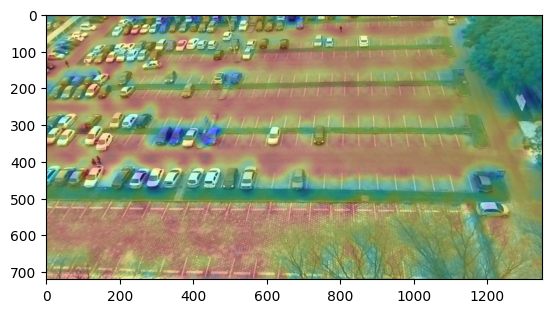

In [17]:
# heatmap empty, red = empty, blue = not empty
plt.imshow(img)
# achieve nicer heatmap by upscaling using INTER_CUBIV interpolation, to see original predictions change to INTER_NEAREST
plt.imshow(cv2.resize(heatmap_empty, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC), cmap='jet', alpha=0.3)

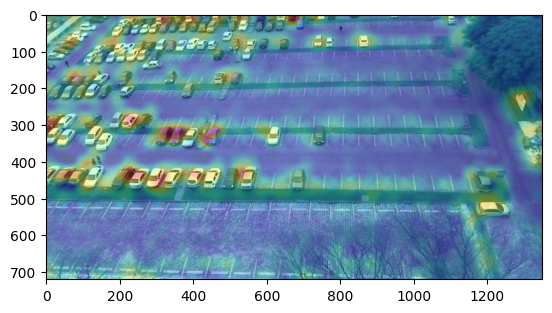

In [18]:
# heatmap occupied, red = occupied, blue = not occupied
plt.imshow(img)
# achieve nicer heatmap by upscaling using INTER_CUBIV interpolation, to see original predictions change to INTER_NEAREST 
plt.imshow(cv2.resize(heatmap_occupied, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC), cmap='jet', alpha=0.3)
#print(cv2.resize(heatmap_occupied, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_AREA))

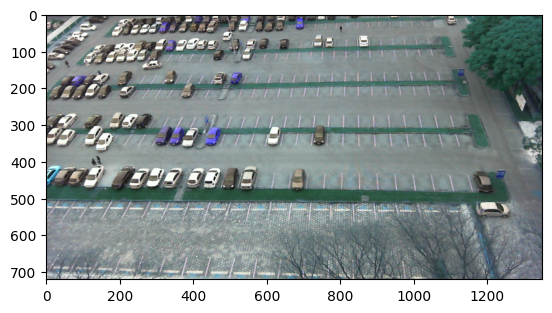

In [6]:
plt.imshow(img)